Information gain is a measure of the amount of information that a feature provides about a class in a classification problem. It is used in decision tree algorithms to determine the most informative features for splitting the data. Features with high information gain are more important for predicting the class labels of new data instances. Information gain is calculated based on the entropy of the class distribution before and after the split, and it ranges from 0 (no gain) to 1 (maximum gain).

#### The formula for information gain (IG) is:

IG(D, A) = H(D) - H(D|A)

#### Where:

###### IG(D, A) is the information gain of feature A in dataset D
###### H(D) is the entropy of the class distribution in dataset D
###### H(D|A) is the conditional entropy of the class distribution in dataset D given feature A
###### Entropy (H) is a measure of the impurity or uncertainty of a dataset. The formula for entropy is:

H(S) = - sum(p_i * log2(p_i))

#### Where:

###### H(S) is the entropy of a set S
###### p_i is the proportion of class i in set S
To calculate the conditional entropy H(D|A), we need to split the dataset D into subsets based on the values of feature A, and calculate the entropy of each subset. The conditional entropy is then calculated as the weighted average of the entropies of the subsets, weighted by the proportion of examples in each subset.

In simple terms, information gain measures the reduction in entropy achieved by splitting the dataset based on a particular feature, and it is used to select the most informative features for building decision trees or other machine learning models.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [4]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [48]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [14]:
# Calculate the information gain for each feature
mutual_info = mutual_info_classif(X, y)

In [15]:
mutual_info

array([0.        , 0.        , 0.25188013, 0.69259544, 0.68848178,
       0.25012805, 0.69238139, 0.42131235, 0.15726932, 0.62395632,
       0.27741398, 0.2187638 , 0.17205084, 0.43669479, 0.374394  ,
       0.4408635 , 0.13554984, 0.43759299, 0.30277764, 0.4073291 ,
       0.14548658, 0.31292185, 0.28829173, 0.24211292, 0.27534979,
       0.26816175, 0.19663352, 0.31599369, 0.33937273, 0.2108199 ,
       0.19324586, 0.16612707, 0.20940438, 0.15130371, 0.18921609,
       0.18089173, 0.17099717, 0.21546498, 0.18930776, 0.01717184,
       0.        , 0.46543489, 0.4482413 , 0.2689151 , 0.24252983,
       0.14000395, 0.46311314, 0.42353623, 0.43521616, 0.43768235,
       0.00228138, 0.01808256, 0.02511312, 0.08874858, 0.14762074,
       0.01341787, 0.06264407, 0.00149728, 0.04497224, 0.41078929,
       0.43667062, 0.31399909, 0.21850524, 0.4385249 , 0.17358523,
       0.37382589, 0.21921561, 0.58370853, 0.14288534, 0.42156425,
       0.04222298, 0.03093819, 0.04817855, 0.04615656, 0.05110

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flow ID              0.692595
Dst IP               0.692381
Src IP               0.688482
Timestamp            0.623956
Init Bwd Win Byts    0.583709
                       ...   
FIN Flag Cnt         0.002281
ECE Flag Cnt         0.001497
Bwd PSH Flags        0.000000
Unnamed: 0.1         0.000000
Unnamed: 0.2         0.000000
Length: 78, dtype: float64

<Axes: >

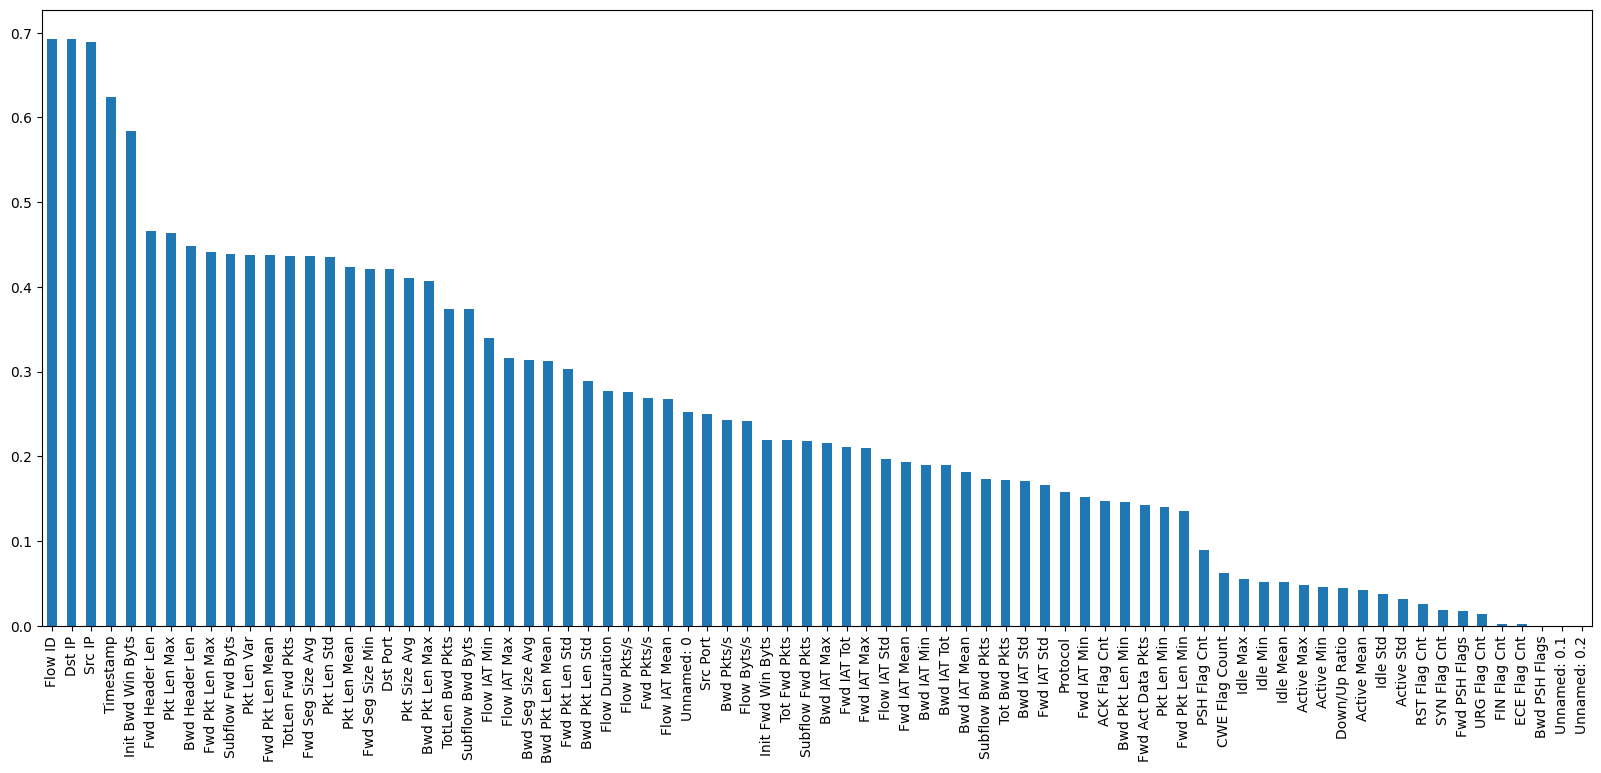

In [17]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [42]:
# Set a threshold (adjust this value as needed)
threshold = 0.1

# Create a DataFrame to store results
results = pd.DataFrame({'Feature': X.columns, 'Information_Gain': mutual_info})

# Filter features based on the threshold
selected_features = results.query('Information_Gain >= @threshold')['Feature']


Unnamed: 0                  Unnamed: 0
Flow ID                        Flow ID
Src IP                          Src IP
Src Port                      Src Port
Dst IP                          Dst IP
Dst Port                      Dst Port
Protocol                      Protocol
Timestamp                    Timestamp
Flow Duration            Flow Duration
Tot Fwd Pkts              Tot Fwd Pkts
Tot Bwd Pkts              Tot Bwd Pkts
TotLen Fwd Pkts        TotLen Fwd Pkts
TotLen Bwd Pkts        TotLen Bwd Pkts
Fwd Pkt Len Max        Fwd Pkt Len Max
Fwd Pkt Len Min        Fwd Pkt Len Min
Fwd Pkt Len Mean      Fwd Pkt Len Mean
Fwd Pkt Len Std        Fwd Pkt Len Std
Bwd Pkt Len Max        Bwd Pkt Len Max
Bwd Pkt Len Min        Bwd Pkt Len Min
Bwd Pkt Len Mean      Bwd Pkt Len Mean
Bwd Pkt Len Std        Bwd Pkt Len Std
Flow Byts/s                Flow Byts/s
Flow Pkts/s                Flow Pkts/s
Flow IAT Mean            Flow IAT Mean
Flow IAT Std              Flow IAT Std
Flow IAT Max             

In [47]:
# Filter columns based on the selected features list
df_selected = df[[col for col in df.columns if col in list(selected_features)]]

(df_selected) 

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min
0,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,0.504694,0.000091,...,0.020035,0.116214,0.000091,0.000177,0.000601,0.000106,0.125015,0.474380,0.000052,0.454545
1,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,0.000015,0.000007,...,0.013879,0.051639,0.000007,0.000009,0.000046,0.000004,0.000000,0.000000,0.000000,0.181818
2,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,0.967061,0.000156,...,0.096874,0.115361,0.000156,0.001465,0.001156,0.000203,0.000000,0.007950,0.000046,0.000000
3,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,0.036977,0.000026,...,0.075450,0.040329,0.000026,0.000190,0.000185,0.000011,0.000000,0.003235,0.000007,0.000000
4,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,0.015704,0.000059,...,0.041172,0.103213,0.000059,0.000233,0.000324,0.000051,0.125015,0.959061,0.000033,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,0.000320,0.000026,...,0.075450,0.041585,0.000026,0.000190,0.000139,0.000009,0.000000,0.500015,0.000007,0.000000
172005,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,0.000113,0.000007,...,0.009683,0.060322,0.000007,0.000006,0.000046,0.000004,0.000000,0.000000,0.000000,0.181818
172006,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,0.000010,0.000026,...,0.075450,0.053162,0.000026,0.000190,0.000139,0.000011,0.000000,0.500015,0.000007,0.000000
172007,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,0.976377,0.000085,...,0.014798,0.154834,0.000085,0.000121,0.000509,0.000120,0.125015,0.002701,0.000039,0.454545


In [49]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [50]:
df_selected.to_csv("InformationGain.csv")